In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [22]:
np.random.seed(0)


In [23]:
n_pts = 500
X, Y = datasets.make_circles(n_samples=n_pts, random_state = 123, noise=0.1, factor=0.2)

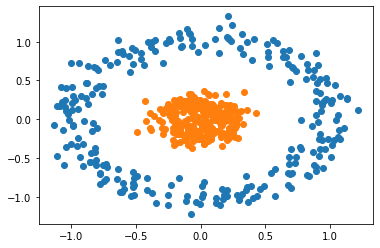

In [24]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [25]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics=['accuracy'])

In [26]:
h = model.fit(x=X,y=Y,verbose = 1, batch_size = 20, epochs = 100, shuffle = 'true')

Epoch 1/100
25/25 [==============================] - 0s 922us/step - loss: 0.6979 - accuracy: 0.5240
Epoch 2/100
25/25 [==============================] - 0s 847us/step - loss: 0.6945 - accuracy: 0.5140
Epoch 3/100
25/25 [==============================] - 0s 832us/step - loss: 0.6937 - accuracy: 0.6560
Epoch 4/100
25/25 [==============================] - 0s 873us/step - loss: 0.6913 - accuracy: 0.6280
Epoch 5/100
25/25 [==============================] - 0s 855us/step - loss: 0.6905 - accuracy: 0.4100
Epoch 6/100
25/25 [==============================] - 0s 751us/step - loss: 0.6885 - accuracy: 0.5480
Epoch 7/100
25/25 [==============================] - 0s 756us/step - loss: 0.6865 - accuracy: 0.6500
Epoch 8/100
25/25 [==============================] - 0s 751us/step - loss: 0.6842 - accuracy: 0.6320
Epoch 9/100
25/25 [==============================] - 0s 743us/step - loss: 0.6812 - accuracy: 0.6220
Epoch 10/100
25/25 [==============================] - 0s 766us/step - loss: 0.6776 - accura

Text(0.5, 0, 'epoch')

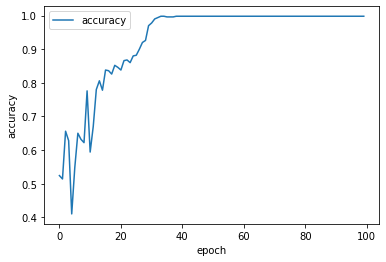

In [29]:
plt.plot(h.history['accuracy'])
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

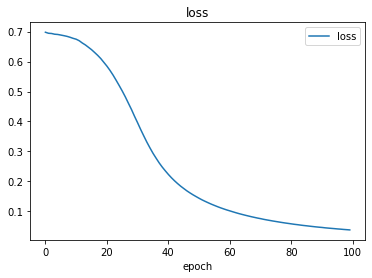

In [30]:
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

In [36]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

Prediction is:  [[0.98495805]]


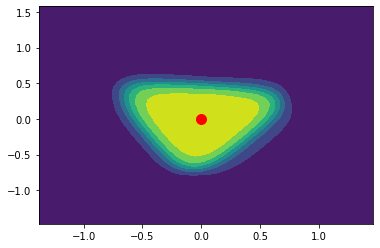

In [35]:
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
#checking whether the model is working correctly or not
x = 0
y = 0

point = np.array([[x, y]])
predict = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", predict)